In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fast=np.load("/Users/prajaktadarade/Documents/Quadeye/ADTK/np_4.npy")
slow=np.load("/Users/prajaktadarade/Documents/Quadeye/ADTK/np_6_speedup_3.png.npy")

In [10]:
print(slow.shape)

(1668, 1)


In [128]:
c=-0.01
slow=np.load("/Users/prajaktadarade/Documents/Quadeye/ADTK/np_6_speedup_3.png.npy")

# for i in range(slow.shape[0]):
#     slow[i][0]+=c*i
# Calculate daily returns
data = pd.DataFrame({
    'date': pd.date_range(start='1/1/2020', periods=slow.shape[0]),
    'close': slow.reshape((-1))
})

data['returns'] = data['close'].pct_change()

# Calculate rolling volatility using standard deviation of returns over a 30-day window
window = 30
data['rolling_volatility'] = data['returns'].rolling(window=window).std()

# Function to detect change in volatility
def detect_volatility_change(volatility,window,threshold=2):
    change_points = []
    for i in range(window, len(volatility)):
        current_vol = volatility[i]
        prev_vol = volatility[i-window:i].mean()
        if (abs(current_vol - prev_vol) / prev_vol )> threshold:
            change_points.append(i)
    return change_points

# Detect changes in volatility
threshold = 0.5  # 10% change
volatility_changes = detect_volatility_change(data['rolling_volatility'].values, window, threshold
                                        )

# Print the dates where volatility changes were detected
change_dates = data['date'].iloc[volatility_changes]

In [143]:
l=np.array([1,2,34])
l[2:3]

array([34])

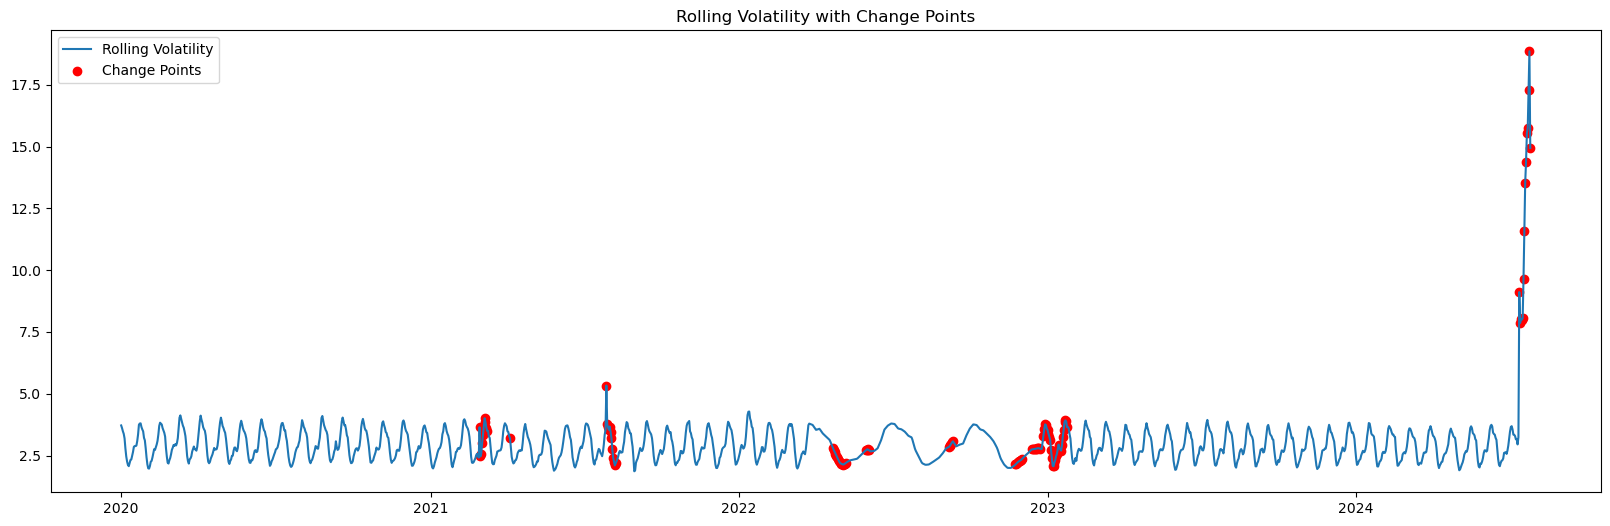

In [129]:
#plot
plt.figure(figsize=(20, 6))
plt.plot(data['date'], data['close'], label='Rolling Volatility')
plt.scatter(change_dates, data['close'].iloc[volatility_changes], color='red', label='Change Points')
plt.title('Rolling Volatility with Change Points')
plt.legend()
plt.show()

In [56]:
!pip install arch
from arch import arch_model

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.8/956.8 kB 936.1 kB/s eta 0:00:0000:0100:01


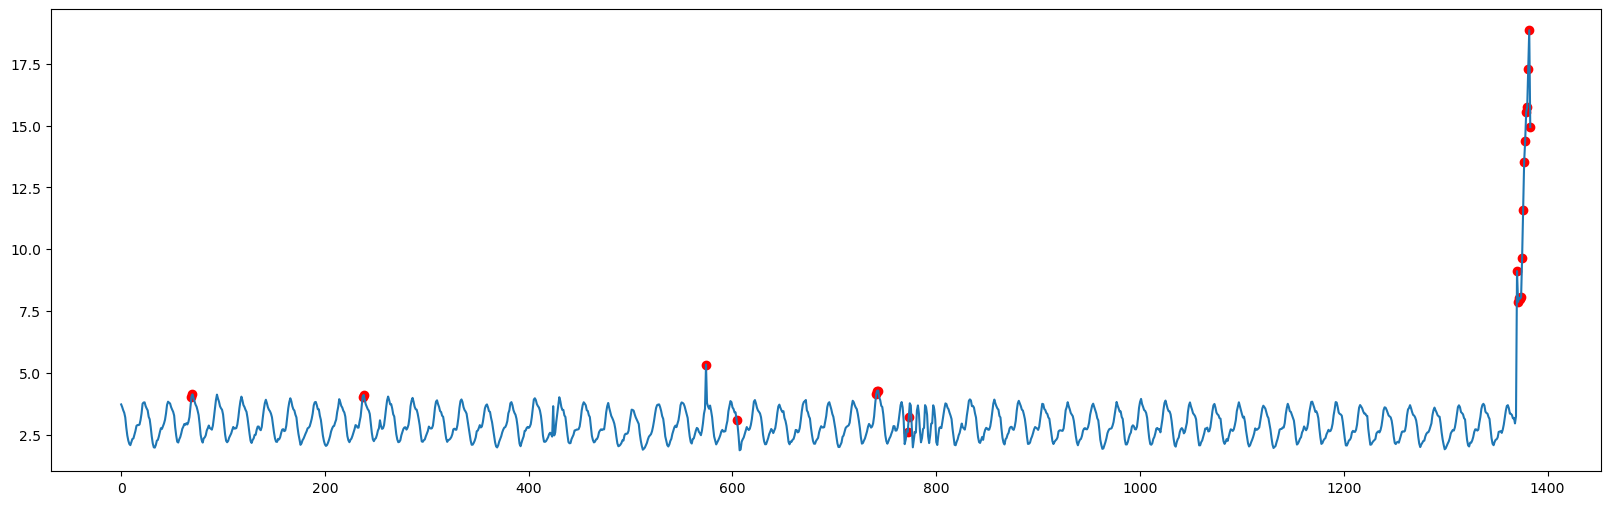

In [142]:
slow=np.load("/Users/prajaktadarade/Documents/Quadeye/ADTK/np_6_speedup_3.png.npy")

fast=np.load("/Users/prajaktadarade/Documents/Quadeye/ADTK/np_4.npy")
c=-0.01
m = 1e18
slow=np.load("/Users/prajaktadarade/Documents/Quadeye/ADTK/np_6_speedup_3.png.npy")
slow=slow.reshape((-1))
for i in range(slow.shape[0]):
    slow[i]+=c*i
    m = min(m, slow[i])

# Calculate daily returns
# slow=slow[500:1250]
data = pd.DataFrame({
    'date': pd.date_range(start='1/1/2020', periods=fast.shape[0]),
    'close': fast.reshape((-1))
})

data['ra']=data['close'].rolling(window=30).std()
anomaly_indices =[]
threshold = 0.03
window = 30
values=[]
for i in range(window, len(data)):
    if(abs(data['ra'].iloc[i]-data['ra'].iloc[i-1])>threshold):
        anomaly_indices.append(i)
        values.append(data['close'].iloc[i])
        
plt.figure(figsize=(20,6))
plt.plot(data['close'])
plt.scatter(
    anomaly_indices,
    values,
    color='red',
)
plt.show()

In [ ]:
c=-0.01
m = 1e18
slow=np.load("/Users/prajaktadarade/Documents/Quadeye/ADTK/np_6_speedup_3.png.npy")
slow=slow.reshape((-1))
for i in range(slow.shape[0]):
    slow[i]+=c*i
    m = min(m, slow[i])

# slow.reshape((-1))
for i in range(slow.shape[0]):
    slow[i] += (-1) * m
# Calculate daily returns
# slow=slow[500:1250]
data = pd.DataFrame({
    'date': pd.date_range(start='1/1/2020', periods=slow.shape[0]),
    'close': slow.reshape((-1))
})

# print(data['returns'])
# Fit GARCH(1,1) model
data['returns'] = data['close'].pct_change().dropna()

data['returns'].iloc[0]=0
data.replace([np.inf, -np.inf], 1e9, inplace=True)


nan_mask = data.isna()

# Check for inf values
inf_mask = np.isinf(data)

# Combine the masks
combined_mask = nan_mask | inf_mask

# Count the values
nan_count = nan_mask.sum().sum()
inf_count = inf_mask.sum().sum()
combined_count = combined_mask.sum().sum()
print(f"NaN count: {nan_count}")
print(f"Inf count: {inf_count}")
print(f"Combined count: {combined_count}")
am = arch_model(data['close'], vol='Garch', p=10, q=10)
res = am.fit(disp='off')

# Predict volatility
data['garch_vol'] = res.conditional_volatility

# Plotting
data['garch_vol'].plot(title='GARCH Volatility')
# data['returns'].plot(title='returns')
data['close'].plot(title='GARCH Volatility', color="green")
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()